<a href="https://colab.research.google.com/github/adinwp/supreme-winner/blob/master/%5BW7_Jan22%5D_Lecture_5_Cluster_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cluster Analysis in Python**


## Content
- Cluster Analysis

# **Preparation**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
# from silhoutte import silhoutte_analysis

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

# **Cluster Analysis**

In [4]:
df = pd.DataFrame({'V1':[2,2,3,4,5,7,6],'V2':[7,6,7,7,2,3,2]})
df

,V1,V2
0,2,7
1,2,6
2,3,7
3,4,7
4,5,2
5,7,3
6,6,2


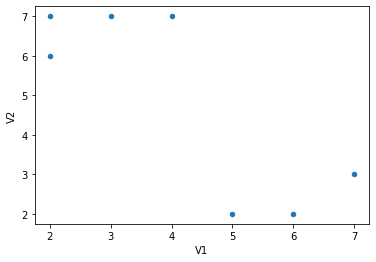

In [5]:
df.plot.scatter(x='V1',y='V2')

In [6]:
cluster_model = cluster.KMeans(n_clusters=2)

In [7]:
cluster_array = cluster_model.fit(df)

In [8]:
cluster_label = cluster_model.labels_

In [9]:
df['cluster'] = cluster_label

In [10]:
df

,V1,V2,cluster
0,2,7,0
1,2,6,0
2,3,7,0
3,4,7,0
4,5,2,1
5,7,3,1
6,6,2,1


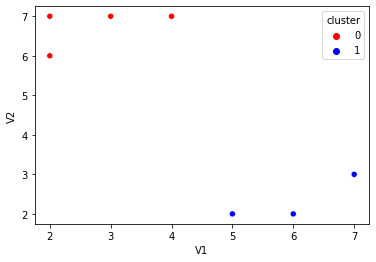

In [11]:
colour = ['red','blue']
sns.scatterplot(x="V1", y="V2", data=df, hue="cluster", palette=colour)

In [12]:
df_test = pd.DataFrame(df, columns = ['a','b'])
df_test

,a,b
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN


<Figure size 1152x576 with 0 Axes>

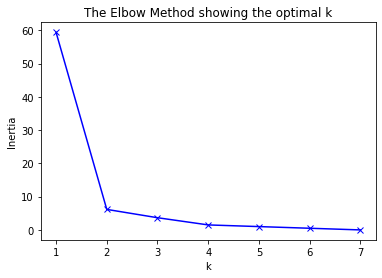

In [13]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7374947561161281
For n_clusters = 3 The average silhouette_score is : 0.5190212210602649
For n_clusters = 4 The average silhouette_score is : 0.33293527621189456


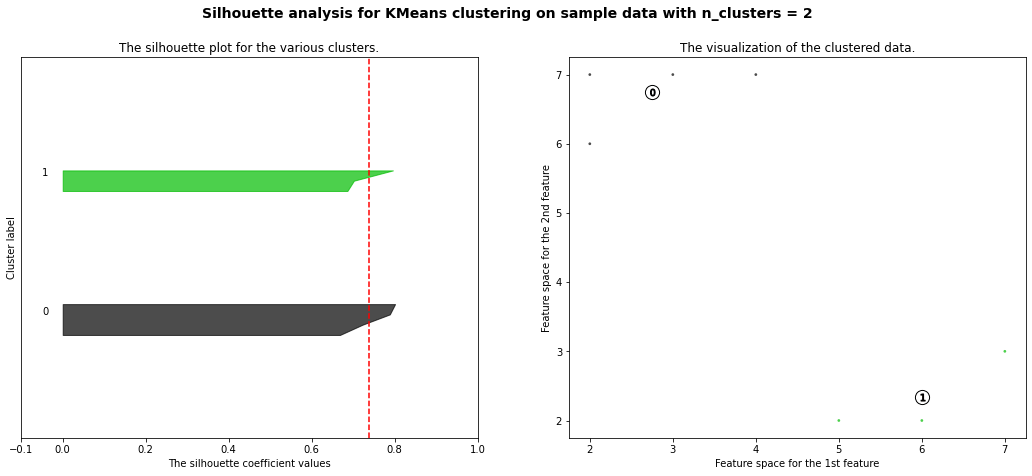

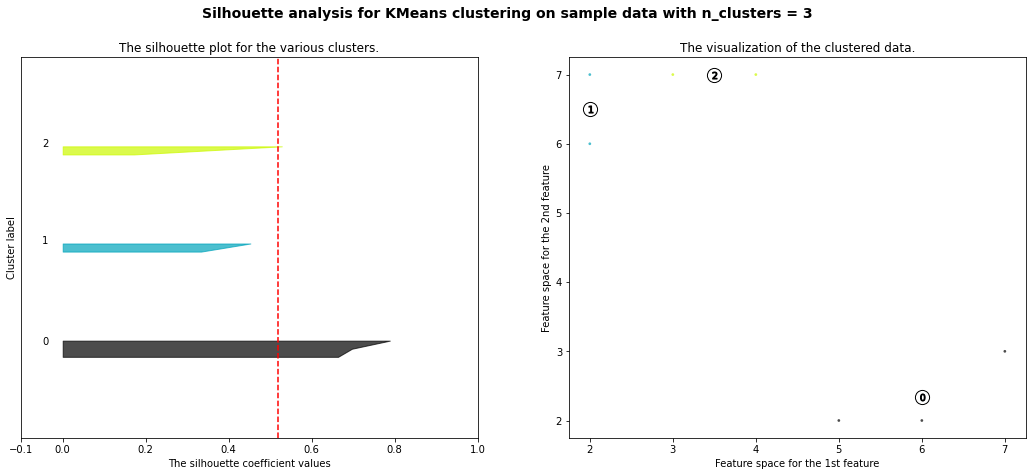

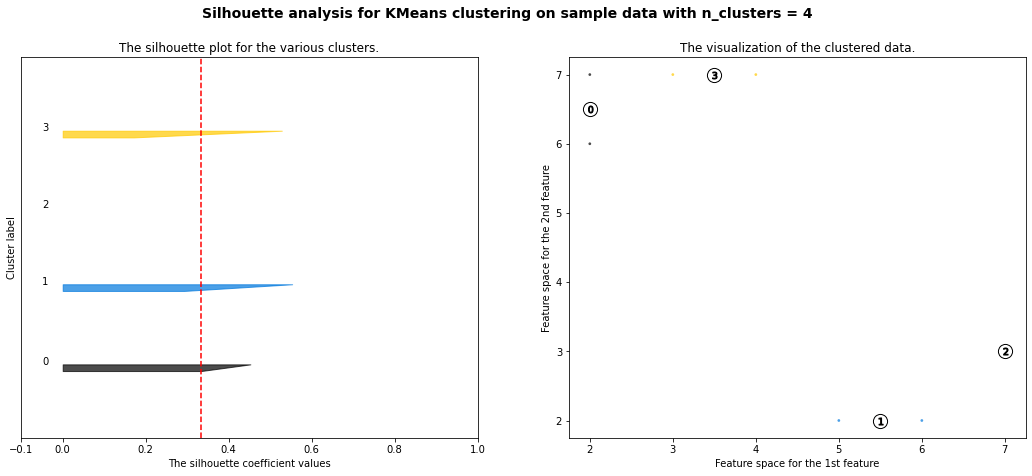

In [14]:
silhoutte_analysis(df,[2, 3, 4])

In [15]:
df.groupby('cluster').mean()

,V1,V2
cluster,,
0,2.75,6.750000
1,6.00,2.333333


In [16]:
df.groupby('cluster')['V1'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,4,2.75,2.5,4,2
1,3,6.00,6.0,7,5


In [17]:
df.groupby('cluster')['V2'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,4,6.750000,7.0,7,6
1,3,2.333333,2.0,3,2


# **Example**

In [18]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1WVeIEjPMyKnpNE-113LgODL3MfdX-35FSsDIhzCAw-4/edit#gid=890851855'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
df

,CustomerID,Gender,Age,Spending
0,1,Male,19,39
1,2,Male,21,81
2,3,Female,20,6
3,4,Female,23,77
4,5,Female,31,40
...,...,...,...,...
195,196,Female,35,79
196,197,Female,45,28
197,198,Male,32,74
198,199,Male,32,18


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Spending    200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [20]:
df[df.duplicated()]

,CustomerID,Gender,Age,Spending


In [21]:
df_cluster = df.copy()
df_cluster['Gender'] = df_cluster['Gender'].astype('category')
df_cluster['Gender'] = df_cluster['Gender'].cat.codes

In [22]:
df_cluster.head(5)

,CustomerID,Gender,Age,Spending
0,1,1,19,39
1,2,1,21,81
2,3,0,20,6
3,4,0,23,77
4,5,0,31,40


<Figure size 1152x576 with 0 Axes>

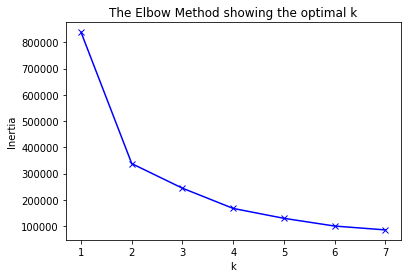

In [23]:
import matplotlib.pyplot as plt
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4764216583753021
For n_clusters = 3 The average silhouette_score is : 0.3607395922815535
For n_clusters = 4 The average silhouette_score is : 0.4299565402226327
For n_clusters = 5 The average silhouette_score is : 0.451126855702469


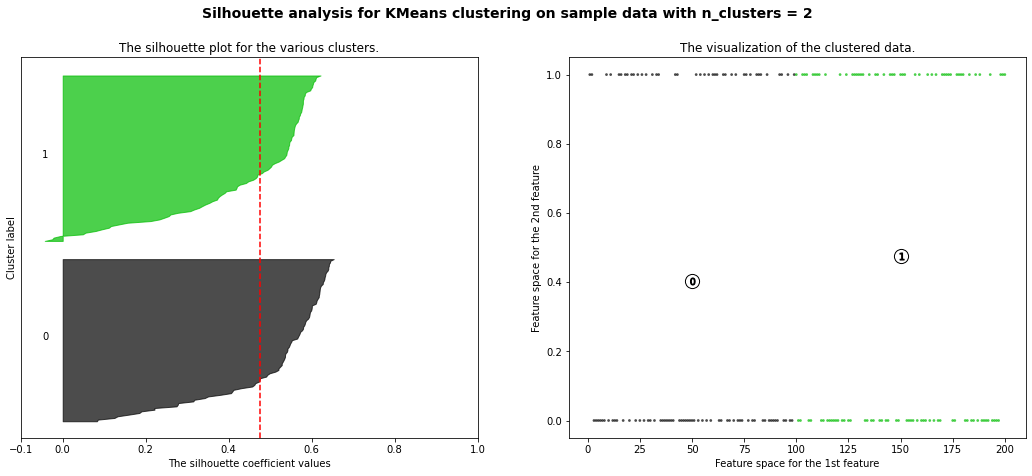

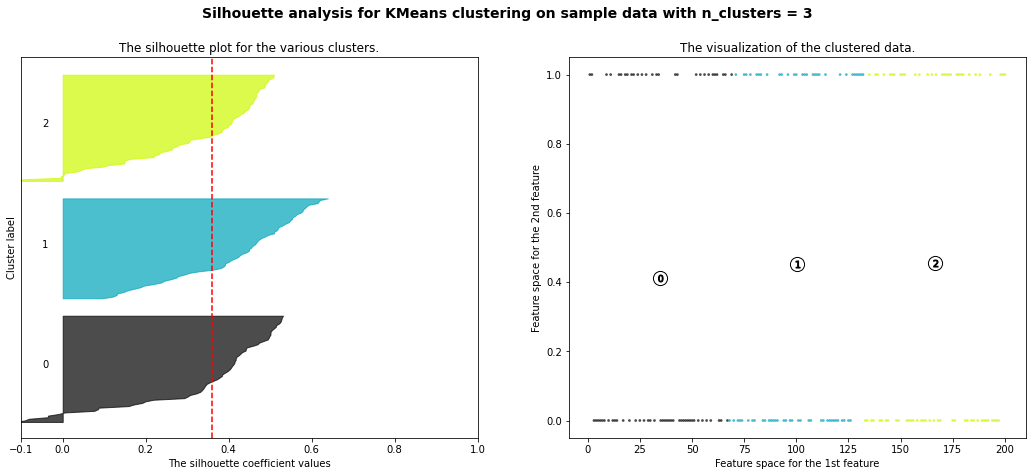

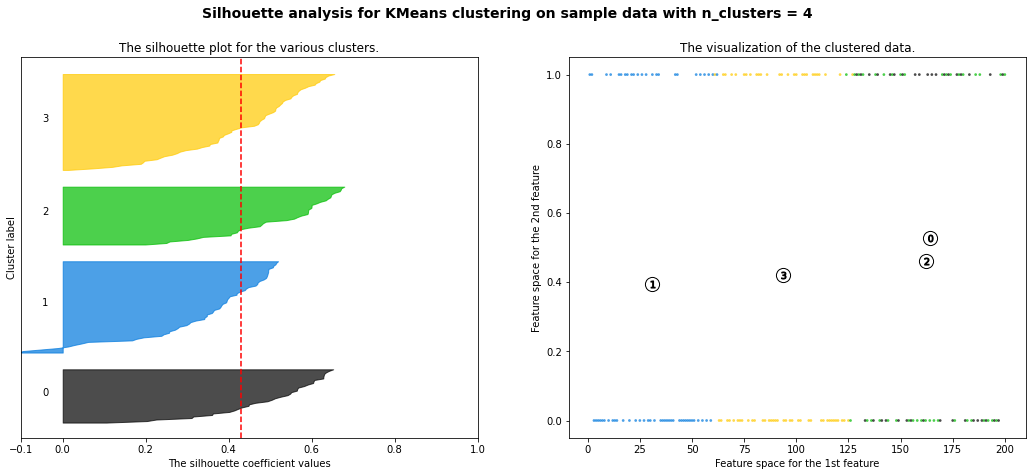

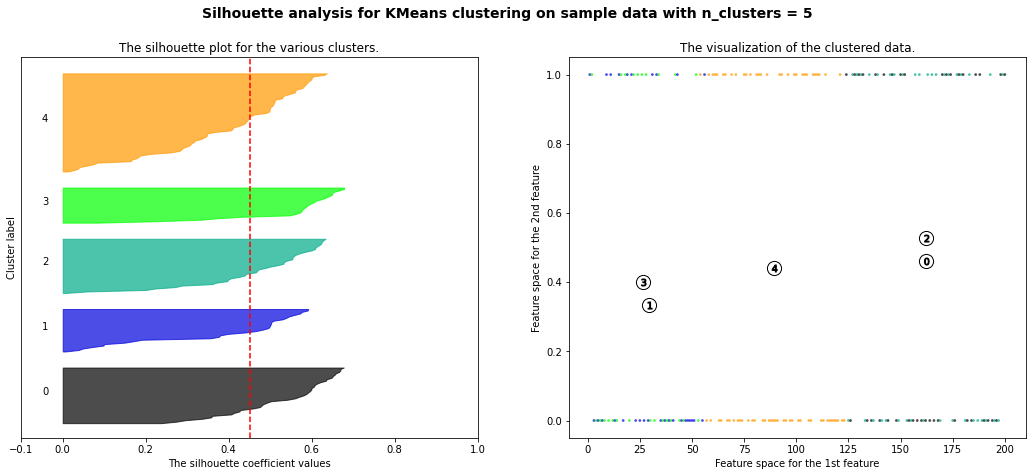

In [24]:
silhoutte_analysis(df_cluster,[2, 3, 4,5])

In [25]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_array = cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
df['cluster'] = cluster_label

In [26]:
df.head(5)

,CustomerID,Gender,Age,Spending,cluster
0,1,Male,19,39,1
1,2,Male,21,81,1
2,3,Female,20,6,1
3,4,Female,23,77,1
4,5,Female,31,40,1


In [27]:
df.groupby('cluster')['Age','Spending'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Age                           Spending                          
        count       mean median max min    count       mean median max min
cluster                                                                   
0          36  40.805556   41.5  59  19       36  17.888889   16.0  40   1
1          61  36.918033   35.0  69  18       61  49.737705   50.0  99   3
2          39  32.692308   32.0  40  27       39  82.128205   83.0  97  63
3          64  43.343750   46.5  70  18       64  49.359375   49.5  60  29

In [28]:
df.groupby(['cluster','Gender'])['CustomerID'].count()

cluster  Gender
0        Female    17
         Male      19
1        Female    37
         Male      24
2        Female    21
         Male      18
3        Female    37
         Male      27
Name: CustomerID, dtype: int64

cluster 3 muda dan kaya (sultan binomo) <br/>
cluster 2 orang tua mapan<br/>
cluster 1 pasmud mapan<br/>
cluster 0 kere<br/>

In [29]:
df.groupby('cluster')['Age','Spending'].agg(['count','mean','median','max','min']).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


cluster                  0          1          2          3
Age      count   36.000000  61.000000  39.000000  64.000000
         mean    40.805556  36.918033  32.692308  43.343750
         median  41.500000  35.000000  32.000000  46.500000
         max     59.000000  69.000000  40.000000  70.000000
         min     19.000000  18.000000  27.000000  18.000000
Spending count   36.000000  61.000000  39.000000  64.000000
         mean    17.888889  49.737705  82.128205  49.359375
         median  16.000000  50.000000  83.000000  49.500000
         max     40.000000  99.000000  97.000000  60.000000
         min      1.000000   3.000000  63.000000  29.000000

## 2nd run